In [1]:
import ebisim as es
%load_ext line_profiler
import matplotlib.pyplot as plt
import scipy

In [15]:
problem = es.problems.ComplexEBISProblem("K", 50, 9000, 15)
%lprun -f problem._rhs problem.solve(1.2, method="BDF")
# %lprun -f es.problems.scipy.integrate.BDF._step_impl problem.solve(1.2, method="BDF")
# %lprun -f es.problems.scipy.integrate.RK45 problem.solve(1, method="RK45")

Timer unit: 2.77397e-07 s

Total time: 0.948434 s
File: Z:\hapahl\PhD\GitHubRepos\EBISSimulation\ebisim\problems.py
Function: _rhs at line 352

Line #      Hits         Time  Per Hit   % Time  Line Contents
   352                                               def _rhs(self, t, y):
   353                                                   """
   354                                                   The right hand side of the ODE system for the complex EBIS problem
   355                                                   """
   356      3655      17007.0      4.7      0.5          del t # not currently needed
   357                                                   ### Electron beam stuff
   358      3655      23737.0      6.5      0.7          e_kin = self.e_kin
   359      3655      27443.0      7.5      0.8          ve = plasma.electron_velocity(e_kin)
   360      3655      15867.0      4.3      0.5          je = self._j / Q_E
   361      3655      12264.0      3.4      0.4          Ne

In [17]:
# es.plotting.COLORMAP = plt.cm.brg
problem = es.problems.ComplexEBISProblem("K", 50, 6000, 15)
_=problem.solve(100, method="Radau")#, method="Radau")
# print(_)

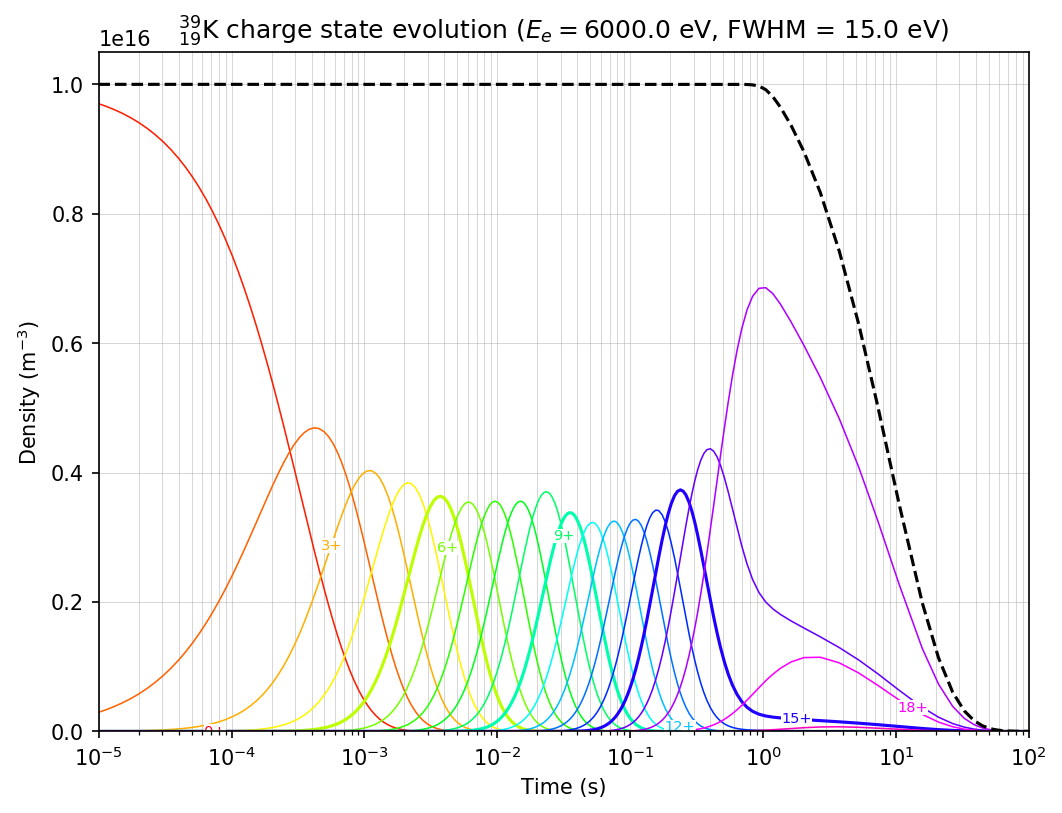

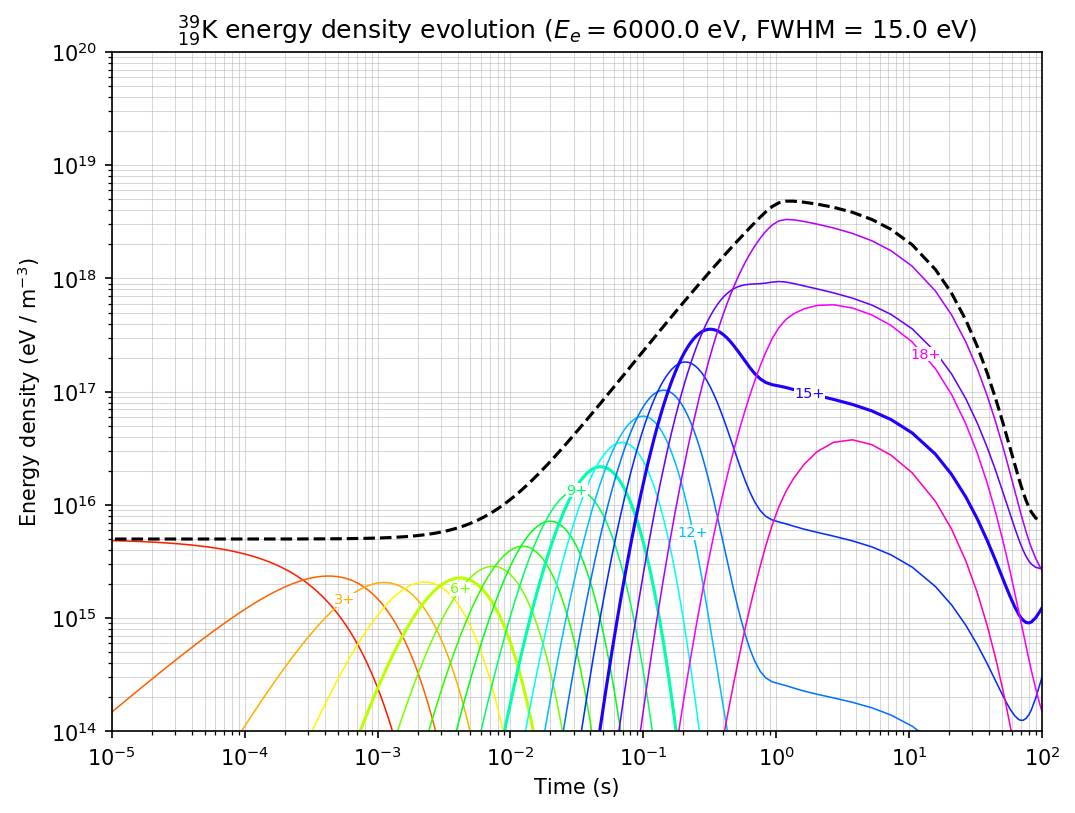

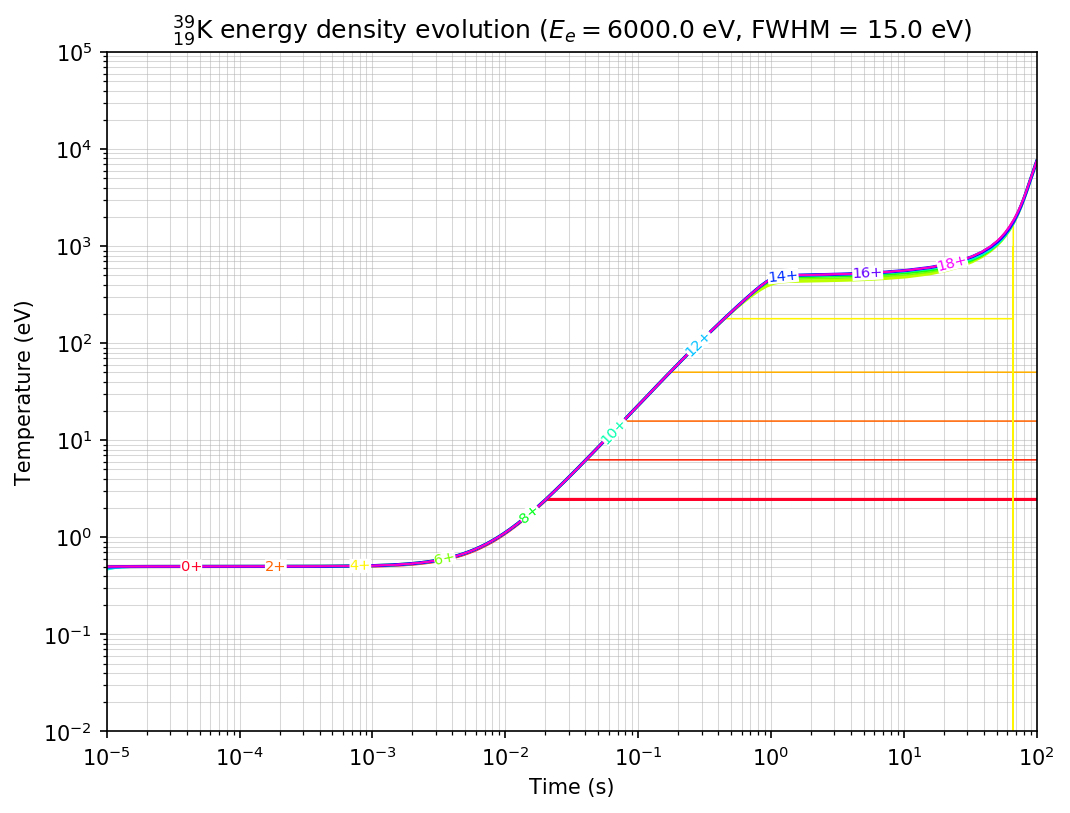

In [18]:
fig =problem.plot_cs_evo()
# fig.gca().set_yscale("log")
# fig.gca().set_ylim(1,1e16)
# fig.gca().set_xlim(1e-6,1e2)
# fig.gca().set_yscale("log")
# fig.gca().set_ylim(1e-21, 1e16)
fig2 = problem.plot_energy_evo()
# fig2.gca().set_xlim(1e-6,1e2)
# fig2.gca().set_ylim(1e12, 1e23)
fig3 = problem.plot_temperature_evo()
# fig3.gca().set_xlim(1e-6,1e2)
# plt.gca().set_yscale("log")
# fig3.gca().set_ylim(1e-2, 1e3)
# fig3.gca().set_xlim(1e-9,5)
plt.show()

In [5]:
xs = es.xs.EIXS("K")

In [6]:
%timeit xs.xs_vector(3000)

125 ns ± 0.199 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [7]:
231966612637415.94/10**13


23.196661263741593

In [8]:
plt.get_cmap("plasma")(2)

(0.075353000000000003, 0.027206000000000001, 0.53800700000000001, 1.0)

In [9]:
404578054.127 * (es.physconst.M_E/es.physconst.M_P)/39

5649.746019443601

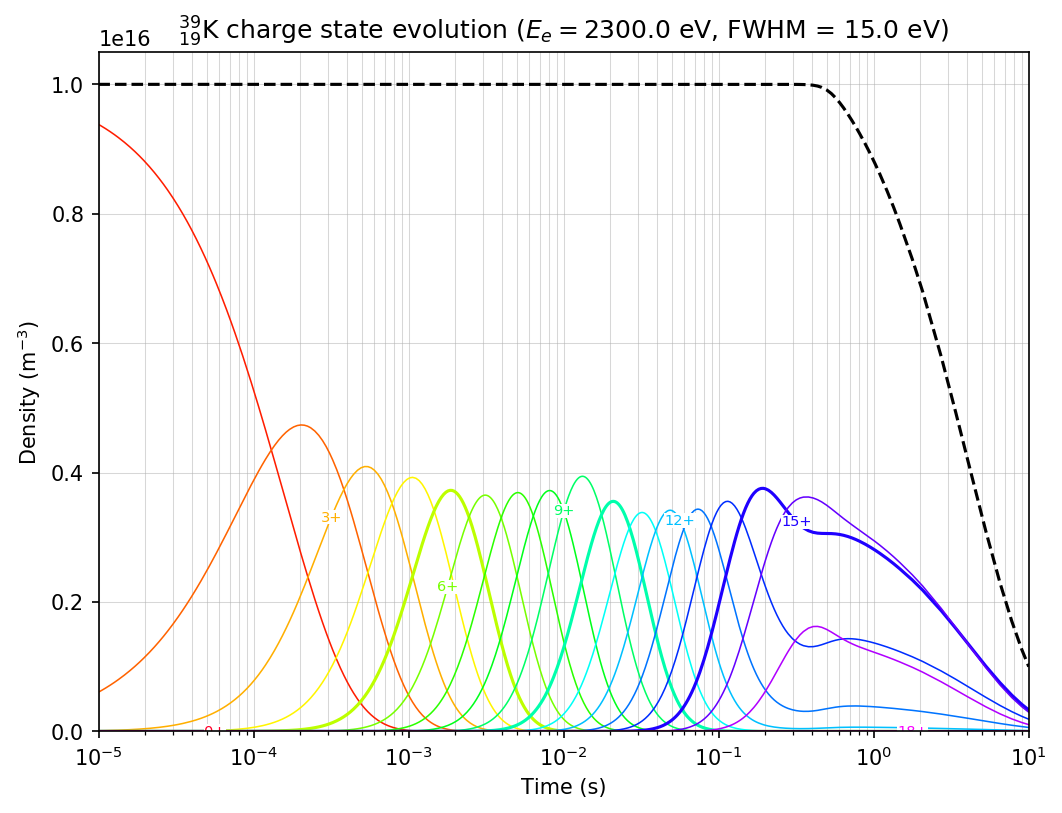

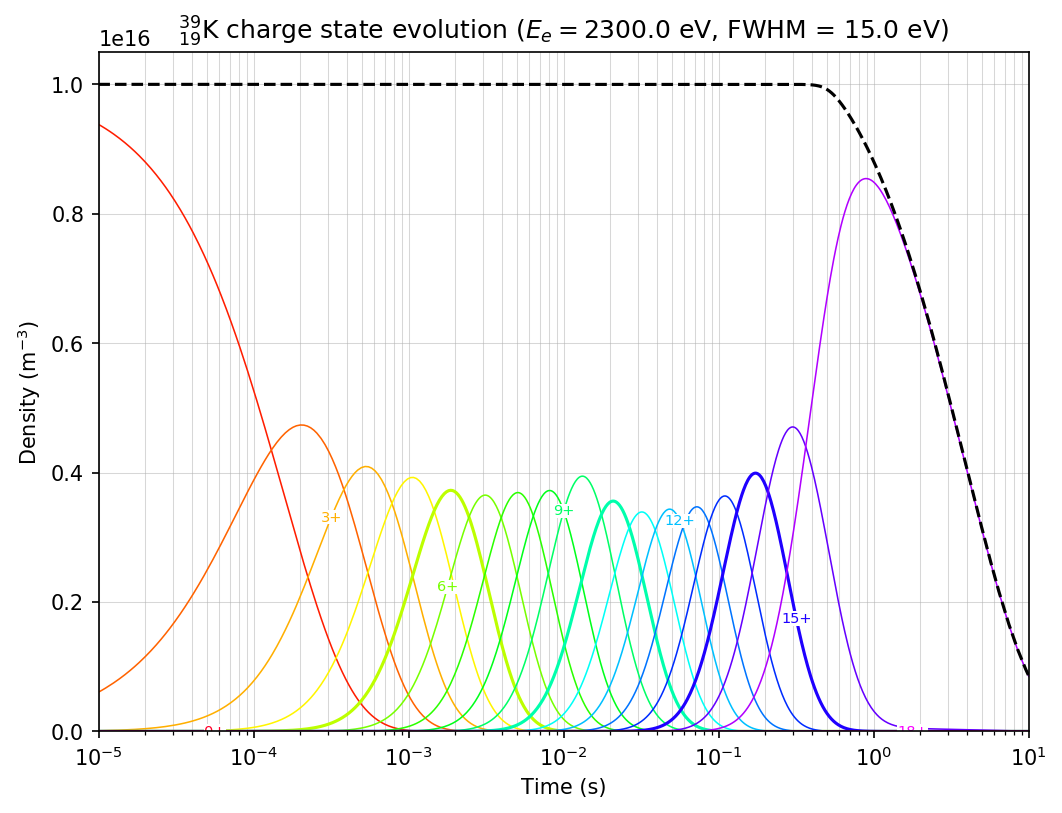

In [12]:
problem = es.problems.ComplexEBISProblem("K", 50, 2300, 15)
problem._bg_N0 =1e-6 / (0.025 * 1.6e-19)
_=problem.solve(10, method="BDF")#, method="Radau")
problem.plot_cs_evo()
problem = es.problems.ComplexEBISProblem("K", 50, 2300, 15)
problem._bg_N0 =0
_=problem.solve(10, method="BDF")#, method="Radau")
problem.plot_cs_evo()
plt.show()